# Couchbase Connector for Streamlit

## 1. Introduction

This project provides a seamless integration between Streamlit and Couchbase, allowing developers to interact with Couchbase databases effortlessly. It enables users to fetch, insert, update, and delete data within Streamlit applications without needing to switch between different SDKs, enhancing the overall development experience.

## 2. Prerequisites


### System Requirements

- Couchbase Capella account ([Docs](https://docs.couchbase.com/cloud/get-started/intro.html))
- An operational cluster created in a project
- Configured cluster access permissions and allowed IP addresses ([Docs](https://docs.couchbase.com/cloud/get-started/connect.html#prerequisites))
- Connection string obtained from Couchbase Capella

### Installing Dependencies

To install the required dependencies, run:

In [24]:
!git clone https://github.com/Couchbase-Ecosystem/couchbase_streamlit_connector.git
!pip install ./couchbase_streamlit_connector/
!pip install python-dotenv

fatal: destination path 'couchbase_streamlit_connector' already exists and is not an empty directory.
Processing ./couchbase_streamlit_connector
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for couchbase_streamlit_connector: filename=couchbase_streamlit_connector-0.1.5-py3-none-any.whl size=14090 sha256=af08ce4310ad2a839c3d6c7c444f6d7cc2cb624d1af0bc047f52e9d061f38c09
  Stored in directory: /tmp/pip-ephem-wheel-cache-4a55omre/wheels/8b/61/48/f7a03ac9241c8c98817358f28aa471c705577a4632842241a7
Successfully built couchbase_streamlit_connector
  Attempting uninstall: couchbase_streamlit_connector
    Found existing installation: couchbase_streamlit_connector 0.1.5
    Uninstalling couchbase_streamlit_connector-0.1.5:
      Successfully uninstalled couchbase_streamlit_connector-0.1.5


''

### Setting up Environment Variables

For better security and convenience, store your credentials in a `secrets.toml` file in the same directory level as this ipynb file. And this `secrets.toml` file should look like so:

```toml
[connections.couchbase]
CONNSTR = "<CONNECTION_STRING>"
USERNAME = "<CLUSTER_ACCESS_USERNAME>"
PASSWORD = "<CLUSTER_ACCESS_PASSWORD>"
BUCKET_NAME = "travel-sample"
SCOPE_NAME = "inventory"
COLLECTION_NAME = "airline"
```

In [16]:
import os
from dotenv import dotenv_values

def check_secrets_file(file_path="./secrets.env"):
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Secrets file '{file_path}' not found. Please create it.")
    required_keys = {"CONNSTR", "USERNAME", "PASSWORD", "BUCKET_NAME", "SCOPE_NAME", "COLLECTION_NAME"}

    try:
        secrets = dotenv_values(file_path)
        if not required_keys.issubset(secrets.keys()):
            missing_keys = required_keys - secrets.keys()
            raise ValueError(f"Secrets file is missing required keys: {', '.join(missing_keys)}")
    except Exception as e:
        raise ValueError(f"Error reading secrets file: {e}")

check_secrets_file()

In [26]:
def read_secrets(file_path="./secrets.env"):
    try:
        secrets = dotenv_values(file_path)
        return {key: secrets.get(key, "") for key in ["CONNSTR", "USERNAME", "PASSWORD", "BUCKET_NAME", "SCOPE_NAME", "COLLECTION_NAME"]}
    except Exception as e:
        print(f"Error reading secrets file: {e}")
        return {}

secrets = read_secrets()

## 3. Usage Guide


### Initializing the Connector

We pass the connection details as keyword arguments:

In [27]:
import streamlit as st
from couchbase_streamlit_connector.connector import CouchbaseConnector

connection = st.connection(
    "couchbase",
    type=CouchbaseConnector,
    CONNSTR= secrets["CONNSTR"],
    USERNAME= secrets["USERNAME"],
    PASSWORD= secrets["PASSWORD"],
    BUCKET_NAME= secrets["BUCKET_NAME"],
    SCOPE_NAME= secrets["SCOPE_NAME"],
    COLLECTION_NAME= secrets["COLLECTION_NAME"]
)

print(connection)

2025-02-17 10:55:48.644 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-17 10:55:48.647 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-17 10:55:48.650 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-17 10:55:49.154 Thread 'Thread-11': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-17 10:55:49.156 Thread 'Thread-11': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-17 10:55:51.164 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-17 10:55:51.165 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


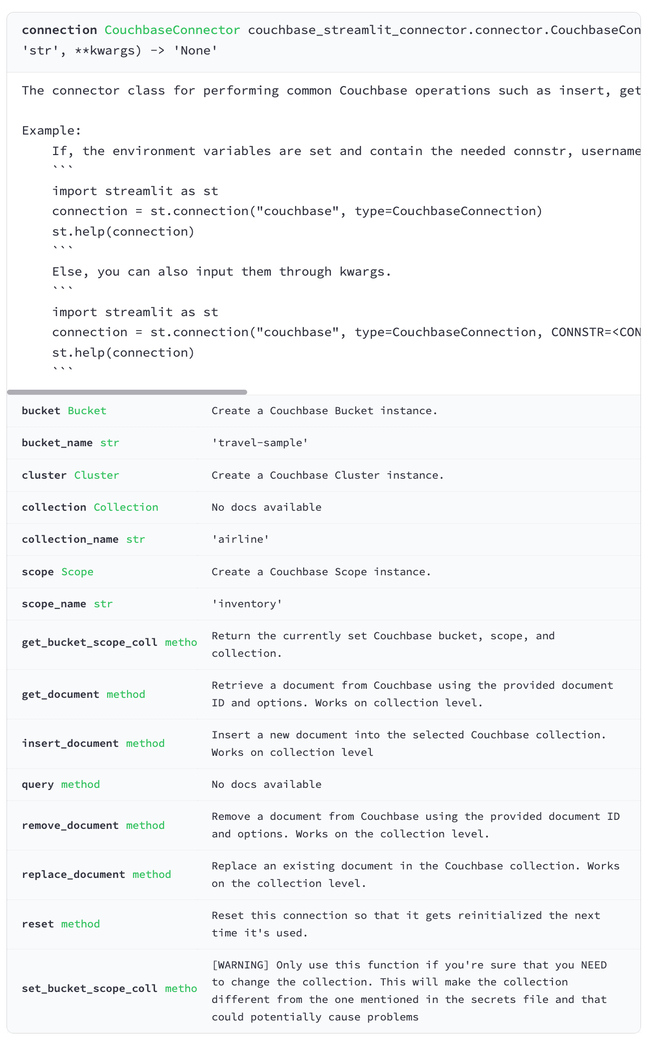

### Performing CRUD Operations


#### **Insert a Document**

In [28]:
connection.insert_document("222", {"key": "value"})
print(connection.get_document("222"))

{'key': 'value'}


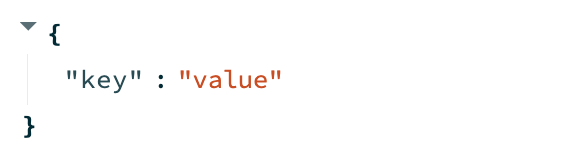

#### **Fetch a Document**

In [29]:
print(connection.get_document("airline_10"))

{'id': 10, 'type': 'airline', 'name': '40-Mile Air', 'iata': 'Q5', 'icao': 'MLA', 'callsign': 'MILE-AIR', 'country': 'United States'}


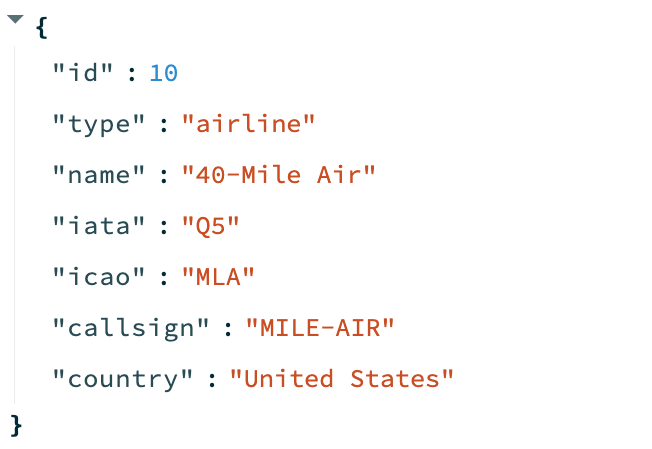

#### **Replace a Document**

In [30]:
connection.replace_document("222", {"new_key": "new_value"})
print(connection.get_document("222"))

{'new_key': 'new_value'}


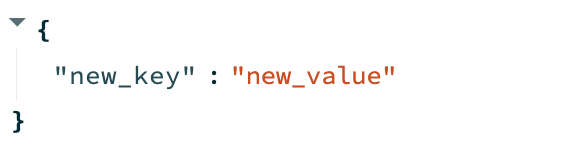

#### **Delete a Document**

In [22]:
connection.remove_document("222")
print("Document 222 deleted")

Document 222 deleted


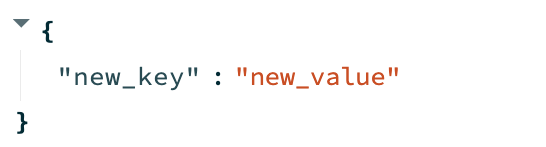

#### **Run a Query**

In [23]:
result = connection.query("SELECT * FROM `travel-sample`.`inventory`.`airline` LIMIT 5;")
data = []
for row in result:
    data.append(row)
print(data)

[{'airline': {'callsign': 'MILE-AIR', 'country': 'United States', 'iata': 'Q5', 'icao': 'MLA', 'id': 10, 'name': '40-Mile Air', 'type': 'airline'}}, {'airline': {'callsign': 'TXW', 'country': 'United States', 'iata': 'TQ', 'icao': 'TXW', 'id': 10123, 'name': 'Texas Wings', 'type': 'airline'}}, {'airline': {'callsign': 'atifly', 'country': 'United States', 'iata': 'A1', 'icao': 'A1F', 'id': 10226, 'name': 'Atifly', 'type': 'airline'}}, {'airline': {'callsign': None, 'country': 'United Kingdom', 'iata': None, 'icao': 'JRB', 'id': 10642, 'name': 'Jc royal.britannica', 'type': 'airline'}}, {'airline': {'callsign': 'LOCAIR', 'country': 'United States', 'iata': 'ZQ', 'icao': 'LOC', 'id': 10748, 'name': 'Locair', 'type': 'airline'}}]


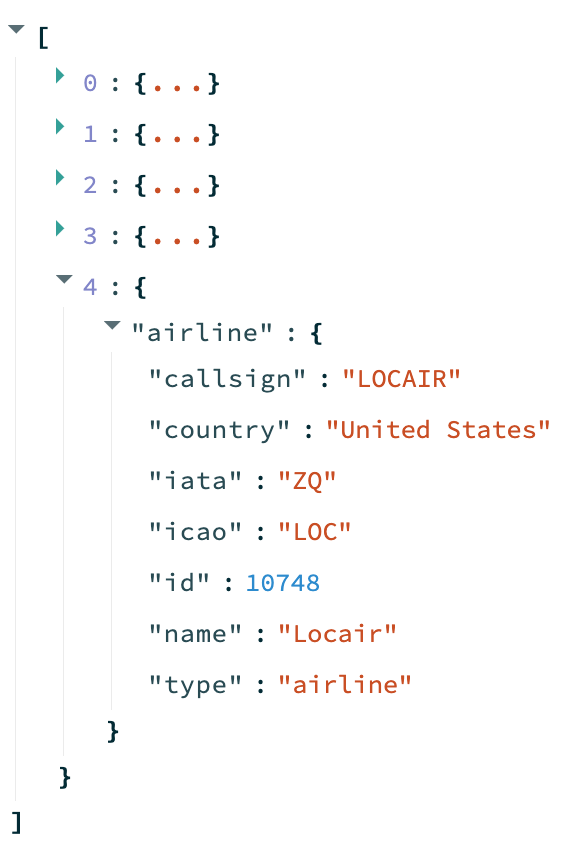